# Programming with Python
#### Vedran Šego, [vsego.org](http://vsego.org/)

## Contents:

1. PIL(low)

![Uniman logo](12a-uniman.gif)

# PIL(low)

PIL stands for Python Imaging Library. It is an old library that was used for image manipulations in Python, but was discontinued in 2011. It's fork (a new product created on the foundations of the old one), named Pillow, added Python 3 support and it is a part of all major Python distributions.

Luckily, they are both used in a similar manner and even their `import` statements are the same. So, if you need to install it manually, be sure to install Pillow and not PIL, but when searching for the information, look for `"PIL"` or `"PIL python3"`.

The next part is only for the easier use in IPython Notebooks:

In [1]:
import IPython.display
from io import BytesIO

from IPython.core import display
from PIL import Image

def display_pil_image(im):
    """Displayhook function for PIL Images, rendered as PNG."""
    # Taken from http://stackoverflow.com/a/26649884/1667018

    b = BytesIO()
    im.save(b, format='png')
    data = b.getvalue()

    ip_img = display.Image(data=data, format='png', embed=True)
    return ip_img._repr_png_()

# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)

## Examples

Here, we open an image and save it under a different name:

In [2]:
from PIL import Image

im = Image.open("12a-uniman.png")
im.save("image.png")

In IPython Notebooks, we use the following two commands to display the images:

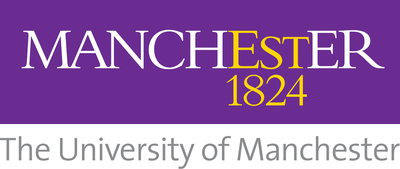

In [3]:
# Reading from a file
IPython.display.Image("image.png")
# Directly from a variable
im

**Note:** In Python programs, instead of just `im` (which works only in IPython Notebooks) to display the image, we usually use `im.show()`, much like we did with Matplotlib in the previous lectures:

In [4]:
im.show()

The main purpose of PIL is easy editing of the existing images.

For example, we can load an image, rotate it by $17^\circ$, and then resize it to the half of its original width while keeping its height.

Size: 400x169


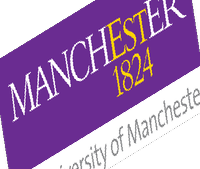

In [5]:
from PIL import Image

im = Image.open("12a-uniman.png")
print("Size: {}x{}".format(im.size[0], im.size[1]))
rot = im.rotate(17).resize((im.size[0]//2, im.size[1]), Image.ANTIALIAS)
rot

To create a new image, we simply use the [<tt>new</tt> function](http://effbot.org/imagingbook/image.htm#tag-Image.new):

In [6]:
im = Image.new("RGBA", (400, 200))

The first argument is the image mode:

* `"RGB"` stands for "Red, Green, Blue" and means that each pixel has a 3-component color value (defined as a tuple of three integers between 0 and 255). All the image editing programs support this and you can use any of them to define your own colors. There are even web pages that help you define colors, for example [Html Color Codes](http://html-color-codes.info/). Here are some of the colors,

  * `(255, 0, 0)` is red,
  
  * `(255, 0, 255)` is purple (full red + full blue and no green),
  
  * `(255, 255, 0)` is yellow.

* `"RGBA"` is the same as `"RGB"` with the addition of the alpha channel, which defines opacity from 0 (fully transparent, i.e., invisible) to 255 (fully visible). For example,

  * `(255, 0, 0, 255)` is fully visible red,
  
  * `(255, 0, 255, 127)` is half-transparent purple,
  
  * `(255, 255, 0, 0)` is invisible.

* `"1"` is black and white,

* `"L"` is grayscale.

There are more modes; you can find them all [here](http://pillow.readthedocs.org/en/latest/handbook/concepts.html#modes).

The second argument is quite obvious: a two-element tuple defining the width and the height of the new image. Such an image is then defined by integer-coordinated pixels from the top left `(0, 0)` to the bottom right `(width-1, height-1)`.

We can now manipulate other images and paste them on this one. For example:

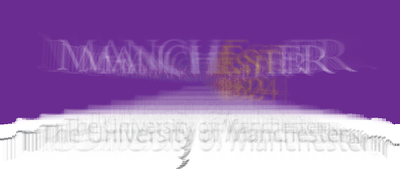

In [7]:
import numpy as np
from math import cos, sin, pi

logo = Image.open("12a-uniman.png")
im = Image.new("RGB", logo.size)
im.paste(logo)

for w in range(logo.size[0], 0, -5):
    # Shrinkage factor
    fact = w / logo.size[0]
    # New height (to maintain the aspect ratio of the logo)
    h = int(round(fact * logo.size[1]))
    # Create a resized version of the logo
    resized = logo.resize((w, h), Image.ANTIALIAS)
    # Convert to NumPy's array, for fast pixel manipulation
    transparent = np.array(resized)
    # Multiply the last component (the alpha channel) by fact**7,
    # making it semi-transparent (smaller the image, stronger the transparency)
    transparent[..., -1] = 255*(0.025 + 0.975*fact**7)
    # Convert back to PIL's Image
    transparent = Image.fromarray(transparent)
    # Paste the resized logo on the image that we're creating
    im.paste(
        transparent,
        (
            int((logo.size[0] - transparent.size[0]) / 2 + 3 * cos(17*pi*fact)),
            int((logo.size[1] - transparent.size[1]) / 2 + 2 * sin(17*pi*fact))
        ), transparent)

# Remove the unneeded variables to release the memory
del resized, transparent

im

It is, of course, possible to draw on the images. Let us draw something on the one that we have just created:

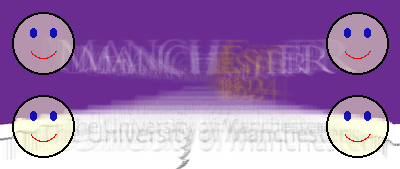

In [8]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im, "RGBA")
r = 31
for x in (43, im.size[0]-43):
    for y in (43, im.size[1]-43):
        draw.ellipse((x-r+1, y-r+1, x+r-1, y+r-1), fill=(255, 255, 200, 127), outline=(0,0,0))
        draw.ellipse((x-r, y-r, x+r, y+r), outline=(0,0,0))
        draw.arc((x-r//2, y-r//2, x+r//2, y+r//2), 30, 150, fill=(255,0,0))
        draw.ellipse((x-r//3-3, y-r//3-5, x-r//3+3, y-r//3+5), fill=(0, 0, 180, 230))
        draw.ellipse((x+r//3-3, y-r//3-5, x+r//3+3, y-r//3+5), fill=(0, 0, 180, 230))

im

We can also draw new images from scratch:

Number of points (pick a prime number): 53


Number of layers: 11


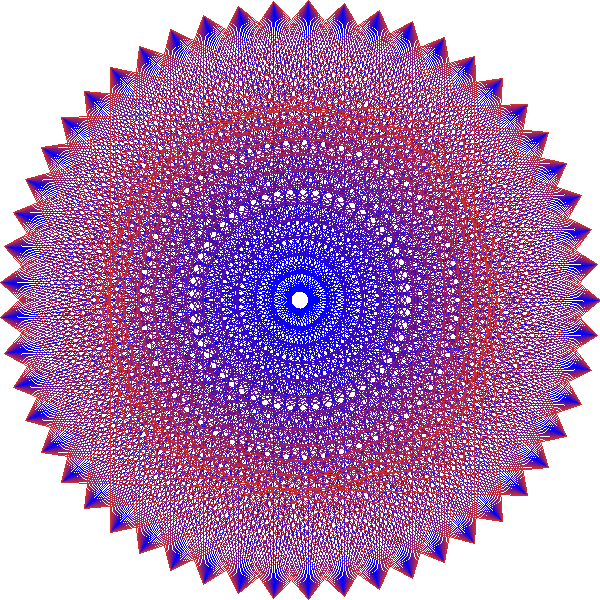

In [9]:
from itertools import takewhile, count

r = 300
n = int(input("Number of points (pick a prime number): ")) # Try 53
l = int(input("Number of layers: ")) # Try 11
col = 255//l
im = Image.new("RGBA", (2*r, 2*r))
draw = ImageDraw.Draw(im)

phi = 2*pi / n
for d in range(l+1):
    draw.polygon([
        (r * (1+cos(k*phi)), r * (1+sin(k*phi)))
            for k in takewhile(lambda t: t == 0 or t % n, (v*(n//2-d) for v in count()))
    ], outline=(3*col*d//4,0,255-col*d, 255-col*d//5))

im

While the above code may seem overly complicated, the basic syntax of the [<tt>polygon</tt> function](http://effbot.org/imagingbook/imagedraw.htm#tag-ImageDraw.Draw.polygon) is simple:
```python
draw.polygon([ (x1, y1), (x2, y2),... ], options)
```
or
```python
draw.polygon([ x1, y1, x2, y2,... ], options)
```
where `options` can be `outline` (the color of the polygon's outline) and `fill` (the color of the polygon's fill).

Such an image can be modified further, for example by using [filters](http://effbot.org/imagingbook/imagefilter.htm):

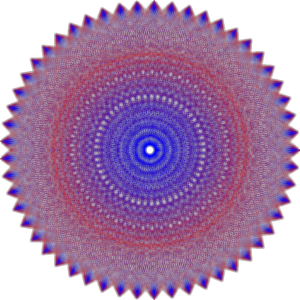

In [10]:
from PIL import ImageFilter

im_blurred = im.filter(ImageFilter.BLUR).resize((im.size[0]//2, im.size[1]//2), Image.ANTIALIAS)
im_blurred

PIL also allows us to invert the colors:

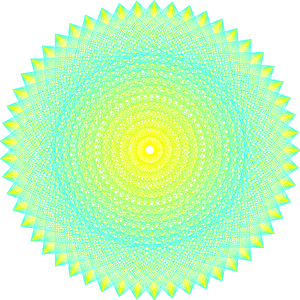

In [11]:
from PIL import ImageOps

resized = im.resize((im.size[0]//2, im.size[1]//2), Image.ANTIALIAS)
inverted = ImageOps.invert(resized.convert("RGB"))
inverted

or to convert the image to a gray scale one:

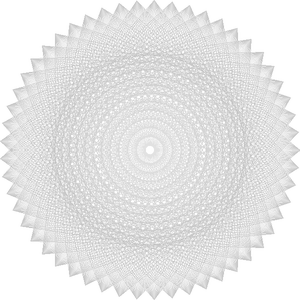

In [12]:
grey = inverted.convert("L")
grey

Maybe [adjust the brightness and the contrast](http://effbot.org/imagingbook/imageenhance.htm) a bit?

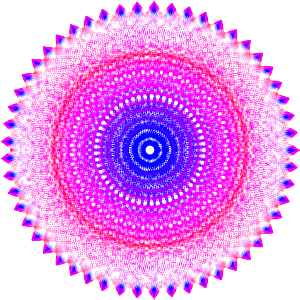

In [13]:
from PIL import ImageEnhance

enhancer = ImageEnhance.Contrast(im_blurred)
im_enhanced = enhancer.enhance(2)
enhancer = ImageEnhance.Brightness(im_enhanced)
im_enhanced = enhancer.enhance(2)
im_enhanced

## A more "wordly" example

It is quite common these days to take loads of photos. Then comes the time to do something with them. Here is how we can easily resize them or make a single image of their thumbnails.

First, we make some necessary preparations so we can display the images in this document (an IPython Notebook accessory):

In [14]:
import IPython.display
import os

def preview_dir(gdir):
    """
    Show all the images in the directory `gdir`.
    
    Written for IPython Notebooks. Python programs should use different approach,
    depending on the GUI that the user wants to use.
    """
    for dirpath, dirnames, filenames in os.walk(gdir):
        for fn in filenames:
            if any(str(fn[-len(ext)-1:]).lower() == "."+ext for ext in image_extensions):
                fname = os.path.join(dirpath, fn)
                print("Filename:", fname)
                IPython.display.display(IPython.display.Image(fname))

Let us now see all the images in the gallery (you can download the whole directory [here](12a-cosplays.zip) (ZIP, 1.8MB)):

Filename: 12a-cosplays/funny-cosplay1.jpg


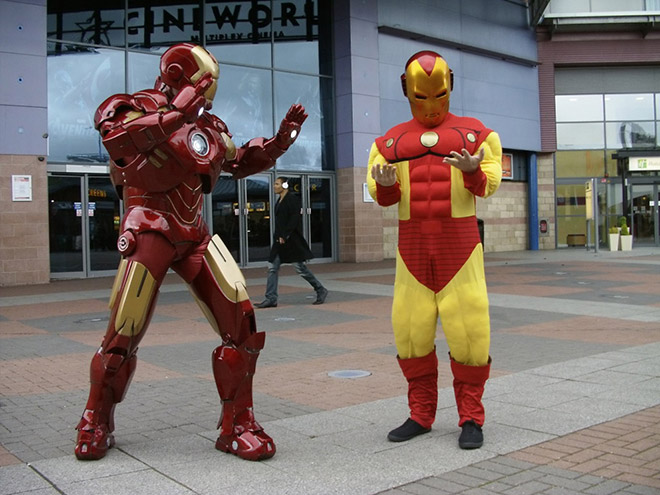

Filename: 12a-cosplays/cosplayers_fail_25.jpg


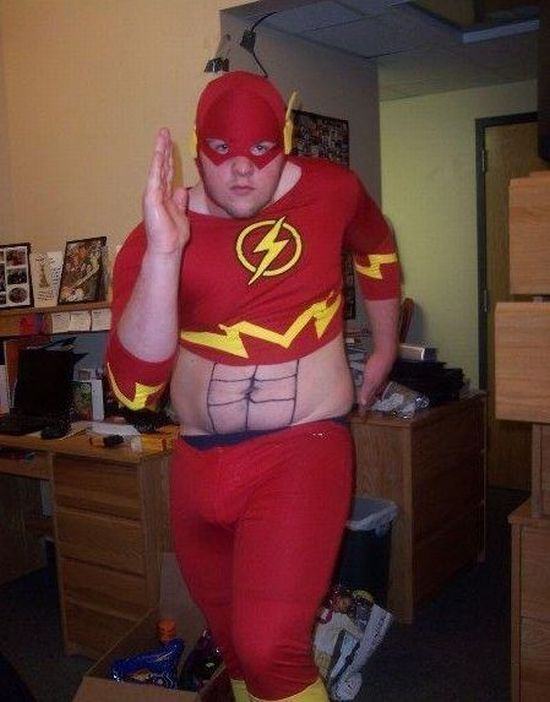

Filename: 12a-cosplays/funny-tomato-cosplay-subway-670925.png


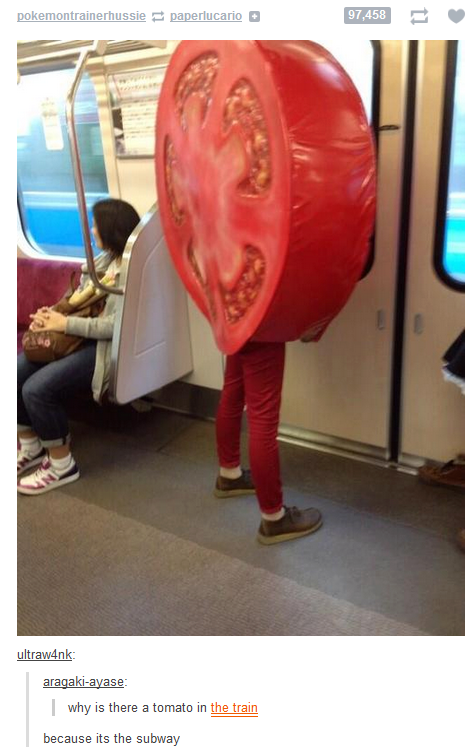

Filename: 12a-cosplays/war machine cosplay fail.png


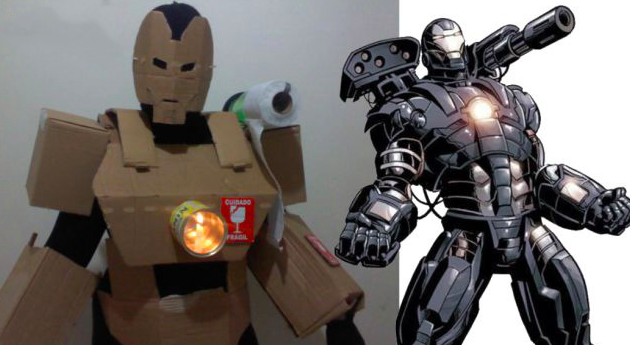

Filename: 12a-cosplays/cosplay-fail-costume-thor.jpg


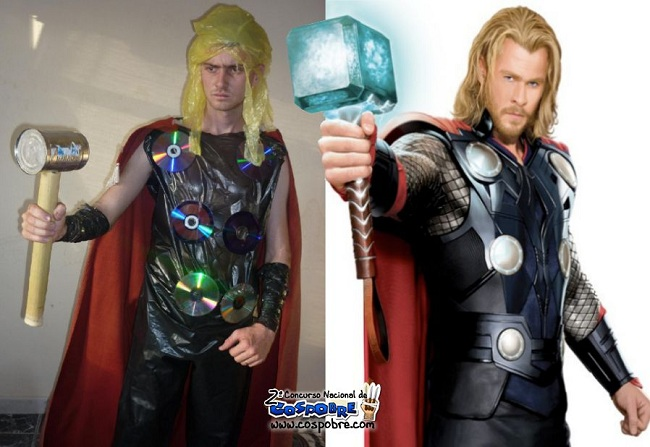

Filename: 12a-cosplays/tumblr_mg1x8nGSLj1qza05bo1_500.jpg


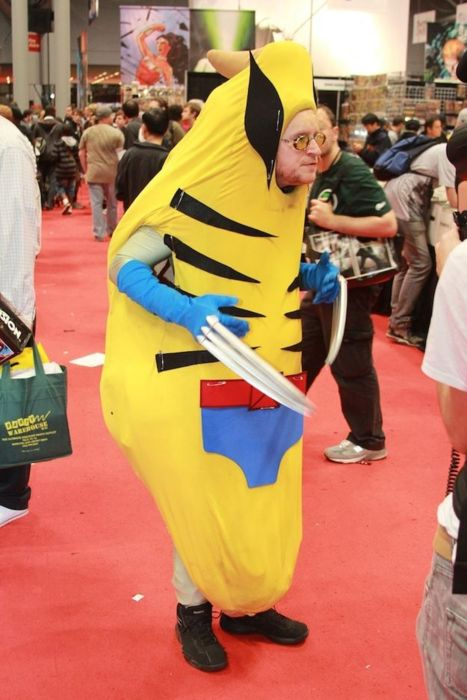

Filename: 12a-cosplays/ninjaturtles.jpg


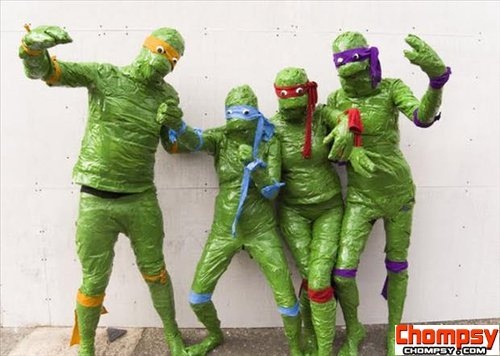

Filename: 12a-cosplays/funny-cosplay-costumes-3.png


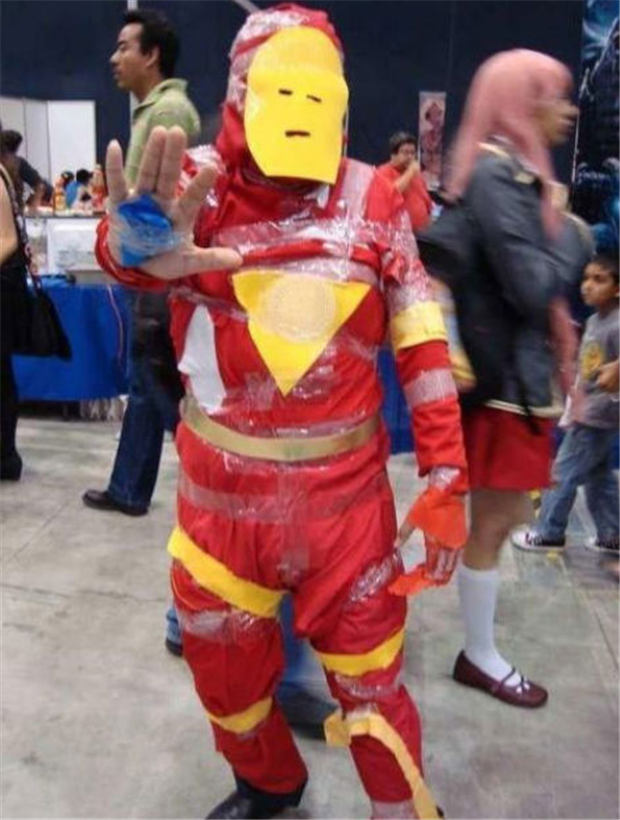

Filename: 12a-cosplays/xmen-cosplay-18.jpg


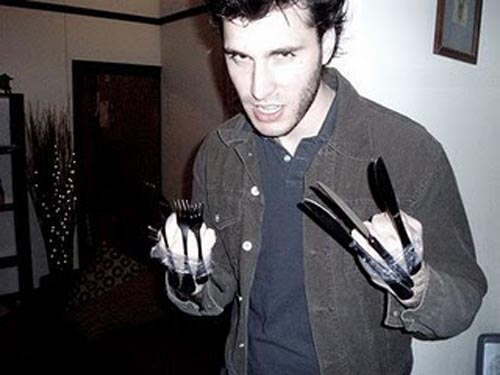

In [15]:
from PIL import Image

# The source directory
gallery_dir = "12a-cosplays"
# The extensions of the file that we're considering
image_extensions = [ "png", "jpg", "jpeg", "gif" ]

preview_dir(gallery_dir)

We have already seen how to resize and save the images, so let us use that now:

In [16]:
# The desired maximum size
# For example, a 1000x600 image will be shrunk to 100x60,
# to make sure that both dimensions are <=(100,100), but
# also to ensure that the aspect ratio is fixed
max_size = (100, 100)
# The destination directory
resized_dir = "12a-cosplays-resized"

# Traverse the directory
for dirpath, dirnames, filenames in os.walk(gallery_dir):
    # Construct the target directory name
    tdir = os.path.join(resized_dir, dirpath[len(gallery_dir):])
    for fn in filenames:
        if any(str(fn[-len(ext):]).lower() == ext for ext in image_extensions):
            # Construct the full (relative) input file name
            fname = os.path.join(dirpath, fn)
            # Make the target directory (if it doesn't already exist)
            # This could have been done before the `for fn` loop, but we want to
            # avoid making empty directories corresponding to those source directories
            # that have no images.
            if not os.path.exists(tdir):
                os.makedirs(tdir)
            # Target file name
            tname = os.path.join(tdir, fn)
            # Load the image
            im = Image.open(fname)
            # Compute the new width and height
            fw = max(1, im.size[0] / max_size[0])  # shrinkage factor for width
            fh = max(1, im.size[1] / max_size[1])  # shrinkage factor for height
            if fw > fh:
                (width, height) = (max_size[0], int(im.size[1] / fw))
            else:
                (width, height) = (int(im.size[0] / fh), max_size[1])
            print('Resizing "{}" to {}x{}.'.format(fname, width, height))
            im = im.resize((width, height), Image.ANTIALIAS)
            print('  Saving it as "{}".'.format(tname))
            im.save(tname)

Resizing "12a-cosplays/funny-cosplay1.jpg" to 100x75.
  Saving it as "12a-cosplays-resized/funny-cosplay1.jpg".
Resizing "12a-cosplays/cosplayers_fail_25.jpg" to 78x100.


  Saving it as "12a-cosplays-resized/cosplayers_fail_25.jpg".
Resizing "12a-cosplays/funny-tomato-cosplay-subway-670925.png" to 62x100.
  Saving it as "12a-cosplays-resized/funny-tomato-cosplay-subway-670925.png".


Resizing "12a-cosplays/war machine cosplay fail.png" to 100x54.
  Saving it as "12a-cosplays-resized/war machine cosplay fail.png".
Resizing "12a-cosplays/cosplay-fail-costume-thor.jpg" to 100x68.
  Saving it as "12a-cosplays-resized/cosplay-fail-costume-thor.jpg".


Resizing "12a-cosplays/tumblr_mg1x8nGSLj1qza05bo1_500.jpg" to 66x100.
  Saving it as "12a-cosplays-resized/tumblr_mg1x8nGSLj1qza05bo1_500.jpg".
Resizing "12a-cosplays/ninjaturtles.jpg" to 100x71.
  Saving it as "12a-cosplays-resized/ninjaturtles.jpg".
Resizing "12a-cosplays/funny-cosplay-costumes-3.png" to 75x100.


  Saving it as "12a-cosplays-resized/funny-cosplay-costumes-3.png".


Resizing "12a-cosplays/xmen-cosplay-18.jpg" to 100x75.
  Saving it as "12a-cosplays-resized/xmen-cosplay-18.jpg".


Something was done. Let us view the gallery of the resized images:

Filename: 12a-cosplays-resized/funny-cosplay1.jpg


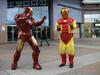

Filename: 12a-cosplays-resized/cosplayers_fail_25.jpg


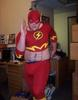

Filename: 12a-cosplays-resized/funny-tomato-cosplay-subway-670925.png


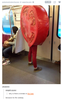

Filename: 12a-cosplays-resized/war machine cosplay fail.png


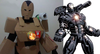

Filename: 12a-cosplays-resized/cosplay-fail-costume-thor.jpg


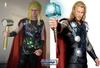

Filename: 12a-cosplays-resized/tumblr_mg1x8nGSLj1qza05bo1_500.jpg


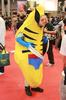

Filename: 12a-cosplays-resized/ninjaturtles.jpg


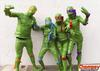

Filename: 12a-cosplays-resized/funny-cosplay-costumes-3.png


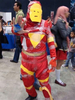

Filename: 12a-cosplays-resized/xmen-cosplay-18.jpg


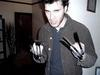

In [17]:
preview_dir(resized_dir)

Let us now, instead of saving all the resized images separately, make a single image containing them all.

Resizing "12a-cosplays/funny-cosplay1.jpg" to 100x75.
Resizing "12a-cosplays/cosplayers_fail_25.jpg" to 78x100.
Resizing "12a-cosplays/funny-tomato-cosplay-subway-670925.png" to 62x100.


Resizing "12a-cosplays/war machine cosplay fail.png" to 100x54.
Resizing "12a-cosplays/cosplay-fail-costume-thor.jpg" to 100x68.


Resizing "12a-cosplays/tumblr_mg1x8nGSLj1qza05bo1_500.jpg" to 66x100.
Resizing "12a-cosplays/ninjaturtles.jpg" to 100x71.


Resizing "12a-cosplays/funny-cosplay-costumes-3.png" to 75x100.
Resizing "12a-cosplays/xmen-cosplay-18.jpg" to 100x75.

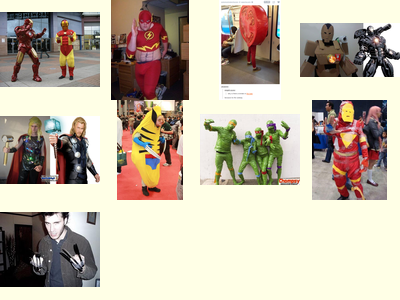

In [18]:
import os
from PIL import Image
from math import ceil

max_size = (100, 100)
cols = 4  # number of columns
bg_color = (255, 255, 230)

# Make the list of file (we need to know how many there are)
files = [
    os.path.join(dirpath, fn)
        for dirpath, dirnames, filenames in os.walk(gallery_dir)
            for fn in filenames
                if any(str(fn[-len(ext):]).lower() == ext for ext in image_extensions)
]
rows = ceil(len(files) / cols)

thumbs = Image.new("RGB", (cols * max_size[0], rows * max_size[1]), bg_color)

for idx, fname in enumerate(files):
    # Load the image
    im = Image.open(fname)
    # Compute the new width and height
    fw = max(1, im.size[0] / max_size[0])  # shrinkage factor for width
    fh = max(1, im.size[1] / max_size[1])  # shrinkage factor for height
    if fw > fh:
        (width, height) = (max_size[0], int(im.size[1] / fw))
    else:
        (width, height) = (int(im.size[0] / fh), max_size[1])
    print('Resizing "{}" to {}x{}.'.format(fname, width, height))
    im = im.resize((width, height), Image.ANTIALIAS)
    # The position of the image's top left corner
    xy = (
        max_size[0] * (idx % cols) + (max_size[0] - im.size[0])//2,
        max_size[1] * (idx // cols) + (max_size[1] - im.size[1])//2
    )
    thumbs.paste(im, xy)

# To save the image as "thumbs.jpg", just uncomment the following line
#thumbs.save("thumbs.jpg")
thumbs

We can also add some text:

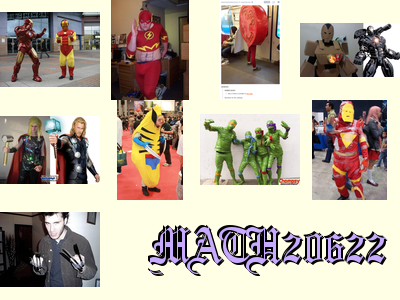

In [19]:
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("OldeEnglish.ttf", 53)
draw = ImageDraw.ImageDraw(thumbs)
text = "MATH20622"
ts = draw.textsize(text, font=font)
for x,y in zip(range(-2,3), range(-2,3)):
    draw.text(
        (x + thumbs.size[0] - ts[0] - 5, y + thumbs.size[1] - (max_size[1] + ts[1]) // 2),
        text,
        font=font,
        fill=(0, 0, 0)
    )
draw.text(
    (thumbs.size[0] - ts[0] - 5, thumbs.size[1] - (max_size[1] + ts[1]) // 2),
    text,
    font=font,
    fill=(200, 170, 255)
)
thumbs

**Note:** In order for this to work properly, you must make sure that the used fonts are available to your program. The easiest way to achieve this is to provide the font file (extension `.ttf`) with the program itself, instead of relying on the system installed fonts.

The font used in the above example is [Olde English](http://fonts.simplythebest.net/fonts/Olde_English.html).

## The title animation

So, how was the title animation created?

![Uniman logo](12a-uniman.gif)

PIL does not support writing to GIF files. Various tricks can be found on the internet on how to work around this problem, but the above animation was actually done in two steps:

* In Python, by using PIL, all the frames were crated as separate PNG files.  
The major part here is the [<tt>transform</tt> function](http://effbot.org/imagingbook/image.htm#tag-Image.Image.transform) which is somewhat hard to use, unless you Google for a bit of help and find a [nice function to help you prepare its input](http://stackoverflow.com/a/14178717/1667018).

* In the Linux shell, a program called [ImageMagick](http://www.imagemagick.org/) (a command-line image editing tool) was used to merge those images into the final animation.

While this is not a Python-only solution, it is fairly portable because ImageMagick can be installed on all major operating systems.

The code used to create the above animation can be downloaded [here](12a-uniman.zip) (36 KiB).